In [1]:
from plotconfroot import *
import rootpy.tree

Welcome to JupyROOT 6.16/00


In [2]:
parfile = rootpy.io.root_open(f"output/inclxx/30dp_600AMeV_4n.ncut.root", "read")
cpar = parfile.R3BNeulandMultiplicityCalorimetricPar

file = rootpy.io.root_open(f"output/inclxx/30dp_600AMeV_4n.train.root", "read")

Using matplotlib backend: agg


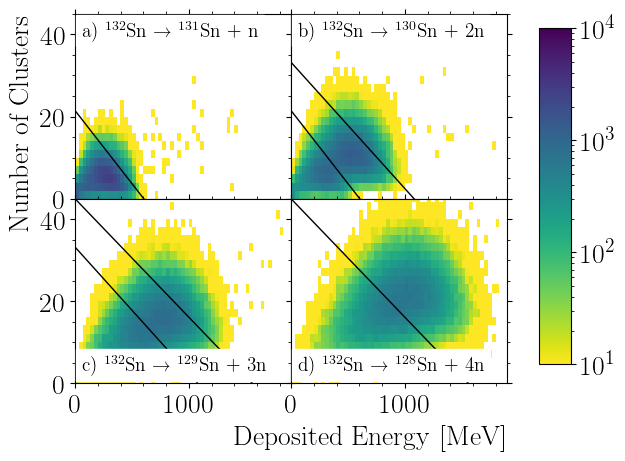

In [3]:
%matplotlib

def doit(i, ax, text, ty):
    h = file.Get(f"NeulandMultiplicityCalorimetricTrain/hnPN{i}")
    cut = cpar.GetNeutronCut(i)
    ax.text(0.03, ty, text, transform=ax.transAxes, size="x-small", backgroundcolor="white")
    norm = mpl.colors.LogNorm(vmin=1e1, vmax=1e4, clip=False)
    im = rplt.imshow(h, axes=ax, cmap=mpl.cm.viridis_r, norm=norm, colorbar=False)
    ax.plot(list(cut.GetX()), list(cut.GetY()), color="black", linewidth=1)
    return im


fig = plt.figure()
axes = fig.subplots(nrows=2, ncols=2, sharex=True, sharey=True, gridspec_kw={"wspace": 0, "hspace": 0})

axes[0][0].set_xlim(0, 1900)
axes[0][0].set_ylim(0, 45)

doit(1, axes[0][0], "a) $^{132}$Sn → $^{131}$Sn + n", 0.88)
doit(2, axes[0][1], "b) $^{132}$Sn → $^{130}$Sn + 2n", 0.88)
doit(3, axes[1][0], "c) $^{132}$Sn → $^{129}$Sn + 3n", 0.07)
im4 = doit(4, axes[1][1], "d) $^{132}$Sn → $^{128}$Sn + 4n", 0.07)

axes[1][1].set_xlabel(r"Deposited Energy [MeV]", horizontalalignment="right", x=1)
axes[0][0].set_ylabel(r"Number of Clusters", horizontalalignment="right", y=1)

fig.subplots_adjust(right=0.8)
cbar_ax = fig.add_axes([0.85, 0.15, 0.05, 0.7])
fig.colorbar(im4, cax=cbar_ax)

fig.savefig(f"results/calibr-1234n.pdf", bbox_inches="tight")

display(fig)

Using matplotlib backend: agg
[-1.0, -1.0, 630.2878584070512, -1.0, -1.0, 1112.2567767933767, 1594.2256951797021, -1.0] [-1.0, -1.0, -1.0, 21.4293099901845, 33.192680841447526, -1.0, -1.0, 44.95605169271056]


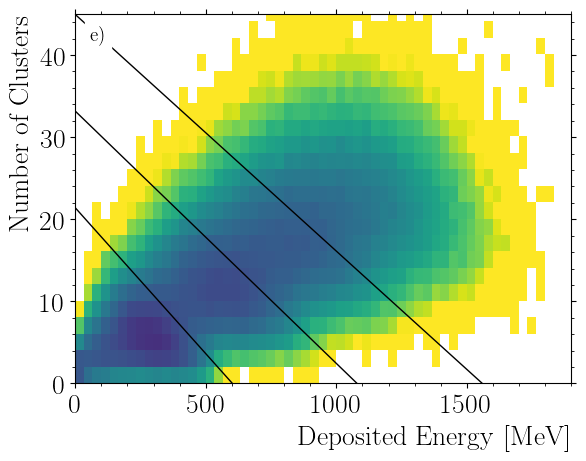

In [4]:
%matplotlib

h1 = file.Get(f"NeulandMultiplicityCalorimetricTrain/hnPN1")
h2 = file.Get(f"NeulandMultiplicityCalorimetricTrain/hnPN2")
h3 = file.Get(f"NeulandMultiplicityCalorimetricTrain/hnPN3")
h4 = file.Get(f"NeulandMultiplicityCalorimetricTrain/hnPN4")
h = h1 + h2 + h3 + h4

fig = plt.figure()
ax = fig.add_subplot(111)

flatten = lambda l: [item for sublist in l for item in sublist]
xs = flatten([list(cpar.GetNeutronCut(i).GetX()) for i in [1, 3]])
ys = flatten([list(cpar.GetNeutronCut(i).GetY()) for i in [1, 3]])
print(xs, ys)

ax.text(0.03, 0.93, "e)", transform=ax.transAxes, size="x-small", backgroundcolor="white")
norm = mpl.colors.LogNorm(vmin=1e1, vmax=1e4, clip=False)
im = rplt.imshow(h, axes=ax, cmap=mpl.cm.viridis_r, norm=norm, colorbar=False)
ax.plot(xs, ys, color="black", linewidth=1)

ax.set_xlim(0, 1900)
ax.set_ylim(0, 45)

ax.set_xlabel(r"Deposited Energy [MeV]", horizontalalignment="right", x=1)
ax.set_ylabel(r"Number of Clusters", horizontalalignment="right", y=1)

fig.savefig(f"results/calibr-sumn.pdf", bbox_inches="tight")

display(fig)